# 1. Data Exploration
The dataset is loaded and checked to ensure that the data is ready for analysis, and help us understand how the target variable('y') be influenced by the features.

The code mounts Google Drive in Google Colab allowing access to files stored there, then specifies the path to the CSV file (`TeleCom_Data-1.csv`) so that it can be read by pandas for analysis.

In [2]:
import pprint
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ColabNotebooks/36103/AT1/TeleCom_Data-1.csv"


Mounted at /content/drive


Read the file into `dataframe_overview` for subsequent data cleaning.

Print and examine the dataset to identify any issues that require preprocessing.

In [3]:
dataframe_overview = pd.read_csv(file_path, header=None)
dataframe_overview.head()
dataframe_overview.info()
dataframe_overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41181 entries, 0 to 41180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       41181 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
2,"56;""services"";""married"";""high.school"";""no"";""no..."
3,"45;""services"";""married"";""basic.9y"";""unknown"";""..."
4,"59;""admin."";""married"";""professional.course"";""n..."
...,...
41176,"29;""unemployed"";""single"";""basic.4y"";""no"";""yes""..."
41177,"73;""retired"";""married"";""professional.course"";""..."
41178,"46;""blue-collar"";""married"";""professional.cours..."
41179,"56;""retired"";""married"";""university.degree"";""no..."


## Data Overview
The dataset contains 41,181 rows and 21 columns.

The first row defines the column headers representing the 21 features.

The dataset includes both numerical and categorical variables.

The target variable is ' y ', which is categorical and indicates whether the client subscribed to a Telecom plan.

## 1.1 Data Cleaning

Semicolon (' ; ') delimiters are present in the dataset, which may interfere with subsequent data analysis.

These delimiters are removed, and the dataset is then reviewed to check for any remaining issues.

In [29]:
# Remove semicolon
df = dataframe_overview[0].str.split(";", expand=True)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,45,"""services""","""married""","""basic.9y""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,59,"""admin.""","""married""","""professional.course""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41176,29,"""unemployed""","""single""","""basic.4y""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,9,1,"""success""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41177,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41178,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41179,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""


Remove quotation marks (' " ') and set the first row as column names.

Then review the dataset to confirm no remaining formatting issues.

In [30]:

# Removw quotation marks
df = df.map(lambda x: x.strip('"') if isinstance(x, str) else x)

# Set the 1st row as column name
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

print(df.shape)
print(df.head())

(41180, 21)
0 age          job  marital            education  default housing loan  \
0  40       admin.  married             basic.6y       no      no   no   
1  56     services  married          high.school       no      no  yes   
2  45     services  married             basic.9y  unknown      no   no   
3  59       admin.  married  professional.course       no      no   no   
4  41  blue-collar  married              unknown  unknown      no   no   

0    contact month day_of_week  ... campaign pdays previous     poutcome  \
0  telephone   may         mon  ...        1   999        0  nonexistent   
1  telephone   may         mon  ...        1   999        0  nonexistent   
2  telephone   may         mon  ...        1   999        0  nonexistent   
3  telephone   may         mon  ...        1   999        0  nonexistent   
4  telephone   may         mon  ...        1   999        0  nonexistent   

0 emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.employed   y  
0          1.1

## 1.2 Missing Values

No missing values were found in any column.

In [31]:
df[df.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## 1.3 Numerical Featuures and Categorical Features

Iterate each column, converting those that can be represented as numeric values and storing their names in `num_col` as numerical features, while recording the names of categorical feature columns in `obj_col`.

Generate descriptive statistics to better understand the data:


*   for numerical features, report standard deviation, minimum, maximum, Q1, Q2, and Q3;

*   for categorical features, provide category counts.

In [32]:
from collections import Counter

column_name = df.columns
num_col = []
obj_col = []
for i, col in enumerate(column_name): # enumerate() returns both the index(i) and the column name(col) of the column
  counts = Counter(df[col])
  if pd.to_numeric(df[col], errors='coerce').notna().all() :
    # change numerical column
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print("Num_col ", col, ":")
    print(df[col])
    print(df[col].describe())
    num_col.append(col)
  else:
    obj_col.append(col)
    print("Distribution of ", col, ":")
    for rating, count in counts.items():
      print(f'{rating}:{count}')
  print()

Num_col  age :
0        40
1        56
2        45
3        59
4        41
         ..
41175    29
41176    73
41177    46
41178    56
41179    44
Name: age, Length: 41180, dtype: int64
count    41180.000000
mean        40.021710
std         10.419593
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

Distribution of  job :
admin.:10422
services:3967
blue-collar:9253
technician:6742
housemaid:1059
retired:1718
management:2923
unemployed:1014
self-employed:1421
unknown:330
entrepreneur:1456
student:875

Distribution of  marital :
married:24921
single:11568
divorced:4611
unknown:80

Distribution of  education :
basic.6y:2292
high.school:9513
basic.9y:6044
professional.course:5241
unknown:1731
basic.4y:4175
university.degree:12166
illiterate:18

Distribution of  default :
no:32581
unknown:8596
yes:3

Distribution of  housing :
no:18619
yes:21571
unknown:990

Distribution of  loan :
no:33943
yes:6247
unkn

Record the column names of numerical and categorical features.

In [33]:
df_copy = df.copy()
# numerical column
print(num_col)
# object column
print(obj_col)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


## 1.4 Chart of Categorical Features

For categorical features, print frequency counts chart.

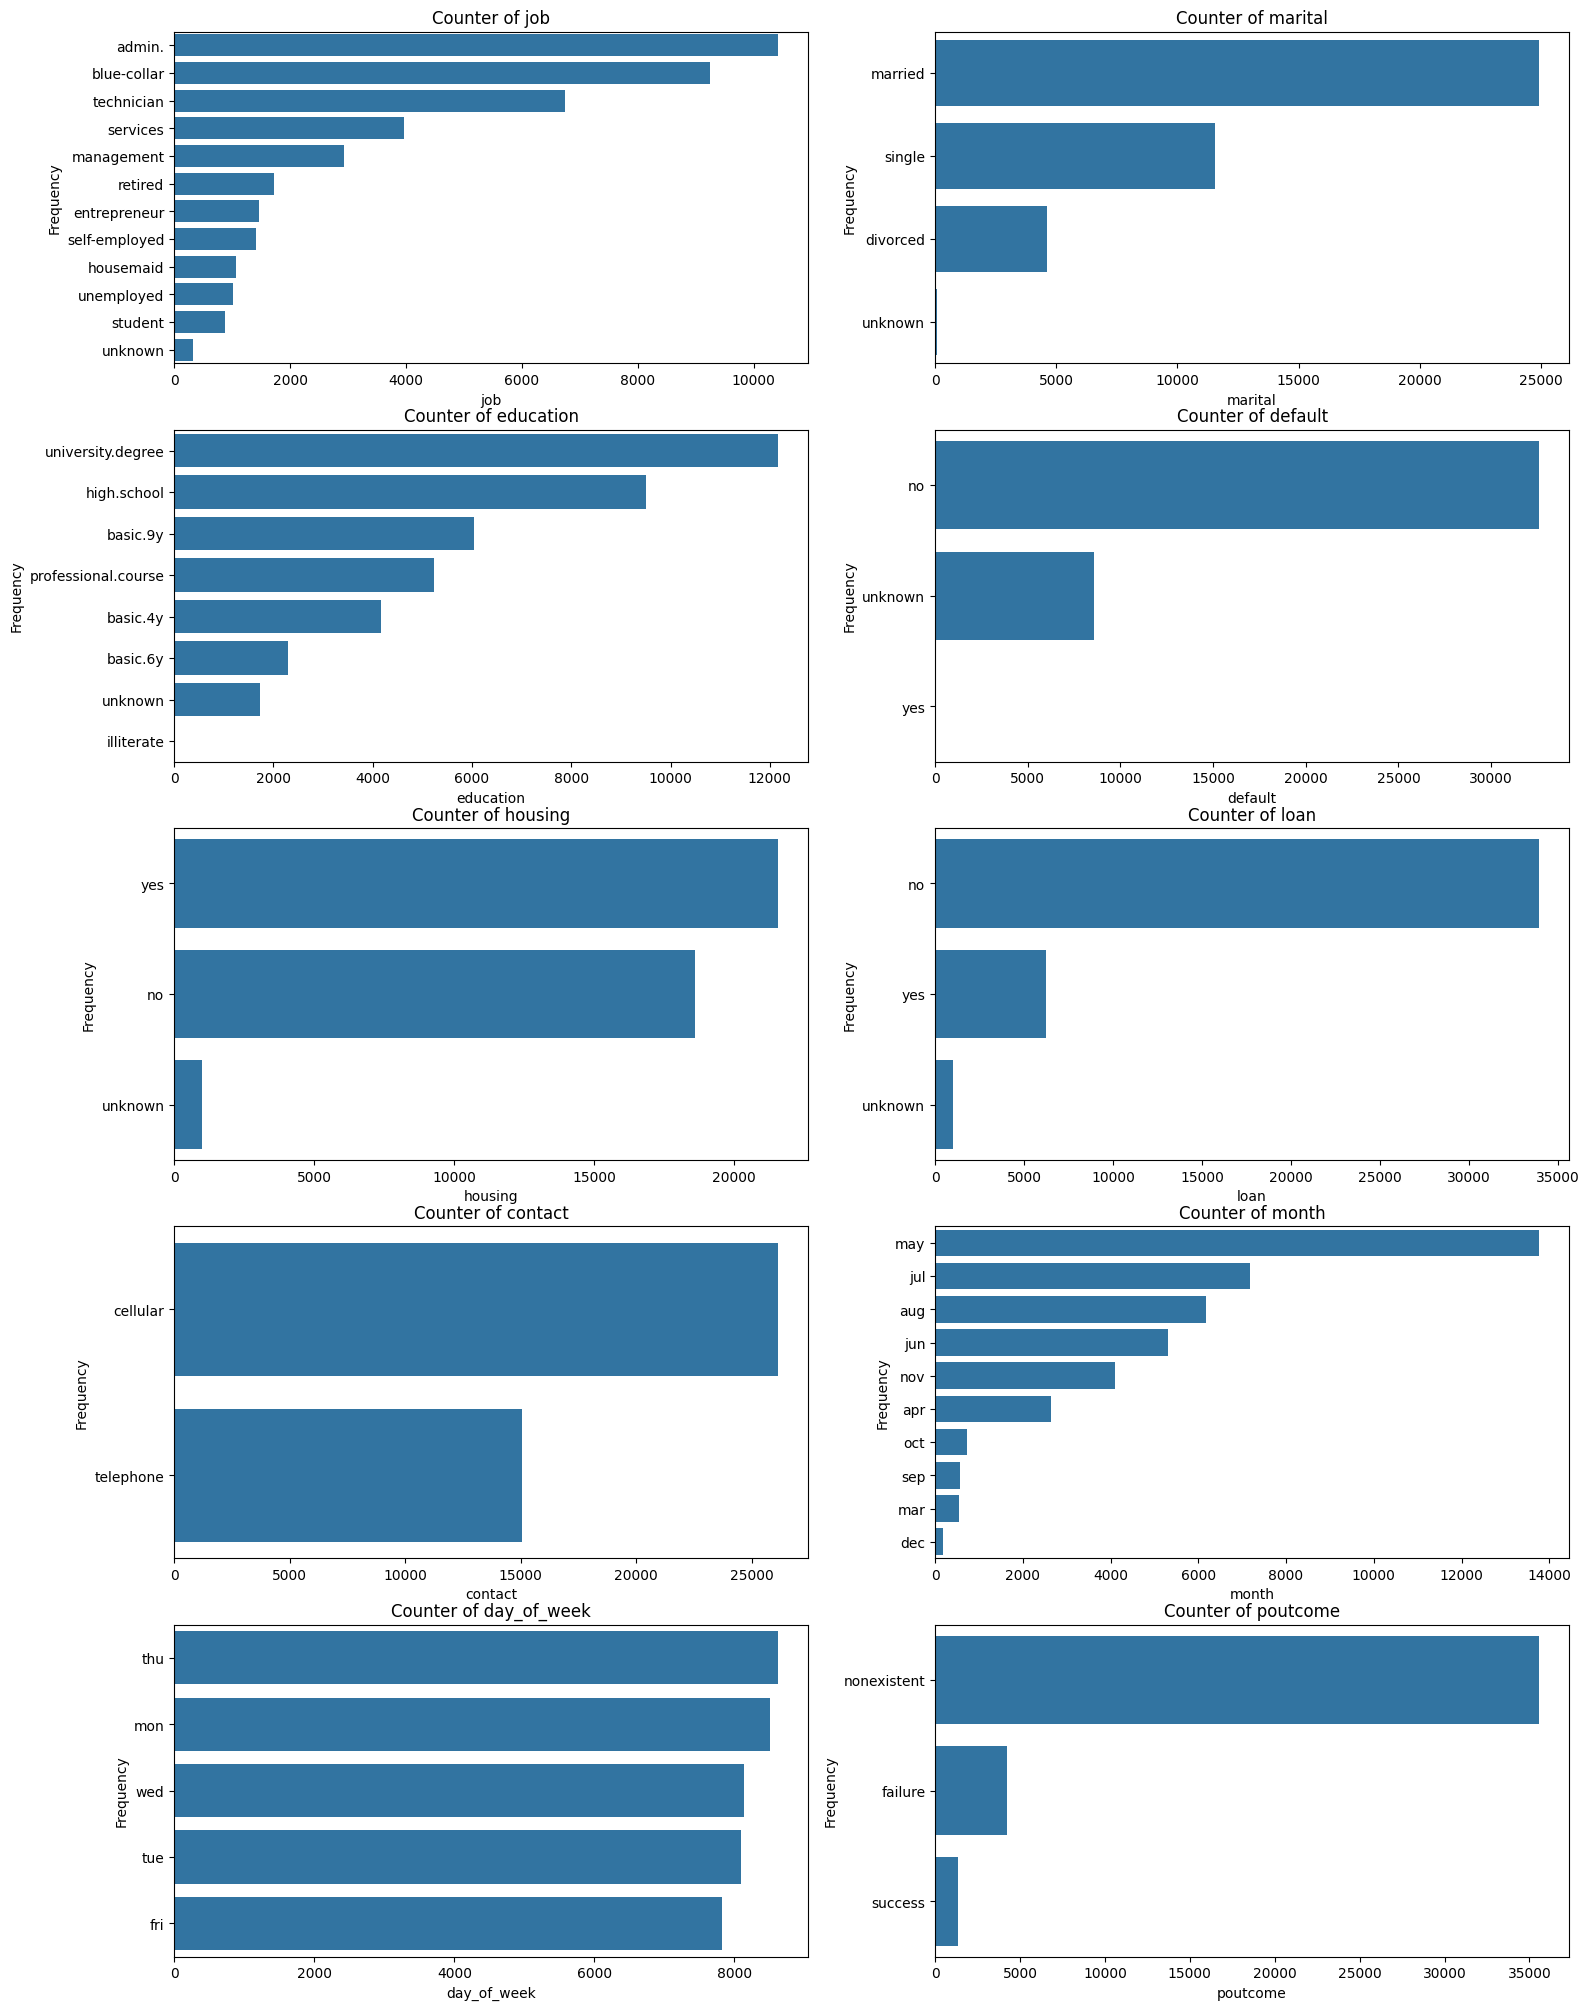

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(5, 2, figsize=(18, 25))
axes = axes.flatten()
for i, var in enumerate(obj_col):
  if var == 'y':
    continue
  sns.countplot(y=df[var], order=df[var].value_counts().index, ax=axes[i])
  axes[i].set_title(f'Counter of {var}')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')

## 1.5 Orderd Categorical Featuures

Ordered categorical features were transformed into numeric form for further analysis.

Such as

*   Yes-1 No-0 unknown-Nan
*   Success-1 Failure-0 Nonexistent-Nan
*   Customer education level is ordinal, ranging from no formal education to professional training and university education.
*   Marital status may can be ordinal, just have a try.


In [35]:
import numpy as np

In [36]:
# y: no:36542 yes:4638
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# marital: married:24921 single:11568 divorced:4611 unknown:80
df['marital'] = df['marital'].map({'single': 1, 'married': 2, 'divorced': 3, 'unknown': np.nan})
# basic.6y:2292 high.school:9513 basic.9y:6044 professional.course:5241 unknown:1731 basic.4y:4175 university.degree:12166 illiterate:18
df['education'] = df['education'].map({'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': np.nan})
# no:32581 unknown:8596 yes:3
df['default'] = df['default'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# housing: no:18619 yes:21571 unknown:990
df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# loan: no:33943 yes:6247 unknown:990
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# poutcome: nonexistent:35559 failure:4250 success:1371
df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0, 'nonexistent': np.nan})

level_col = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome']
for col in level_col:
  print(col)
  print(df[col].value_counts())

marital
marital
2.0    24921
1.0    11568
3.0     4611
Name: count, dtype: int64
education
education
6.0    12166
4.0     9513
3.0     6044
5.0     5241
1.0     4175
2.0     2292
0.0       18
Name: count, dtype: int64
default
default
0.0    32581
1.0        3
Name: count, dtype: int64
housing
housing
1.0    21571
0.0    18619
Name: count, dtype: int64
loan
loan
0.0    33943
1.0     6247
Name: count, dtype: int64
poutcome
poutcome
0.0    4250
1.0    1371
Name: count, dtype: int64


## 1.6 Chart of Numberical Features

For numberical features, print frequency counts chart.

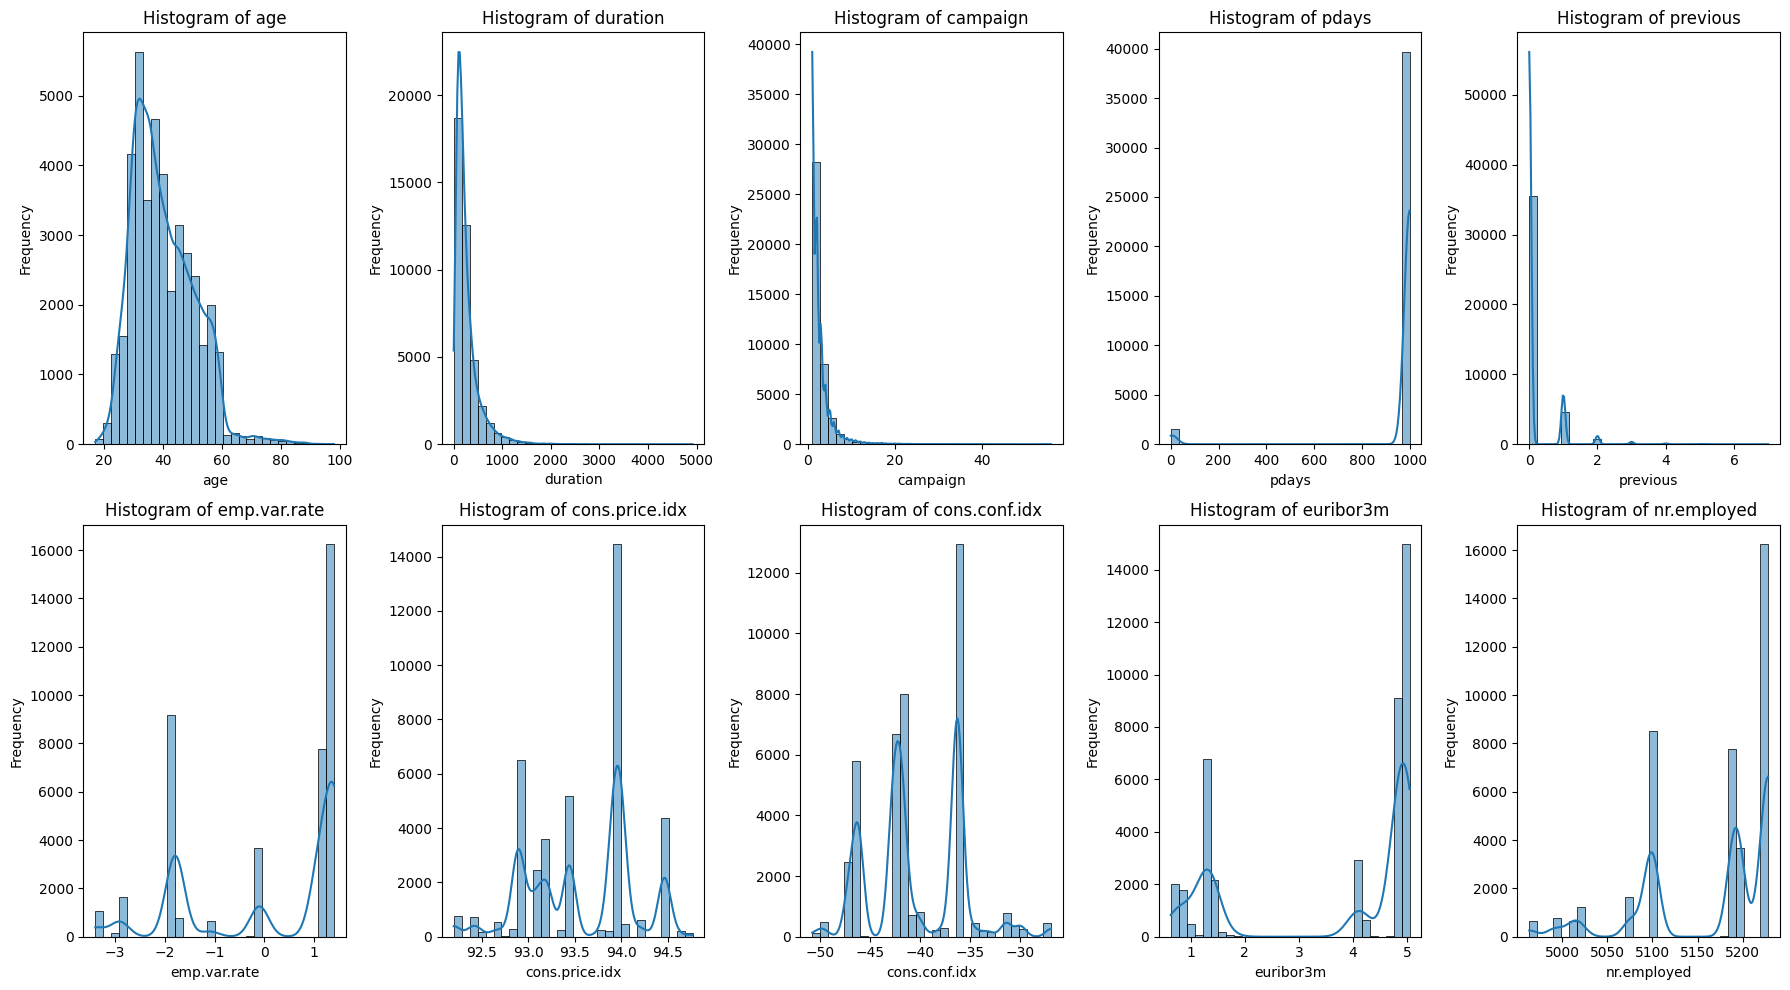

In [37]:

fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## 1.7 Chart of Target Features

For target features, print frequency counts chart.


Target feature(y) distribution:
y
0    0.887373
1    0.112627
Name: proportion, dtype: float64


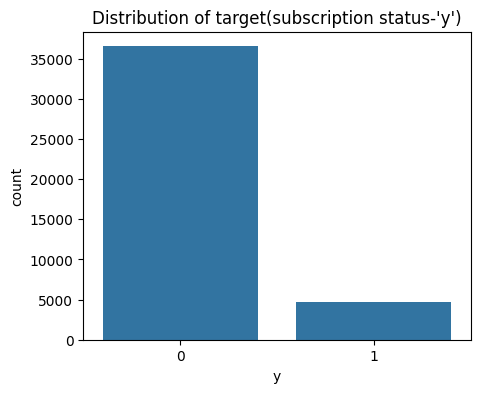

In [38]:

print("\nTarget feature(y) distribution:")
print(df['y'].value_counts(normalize=True))

plt.figure(figsize=(5,4))
sns.countplot(x="y", data=df)
plt.title("Distribution of target(subscription status-'y')")
plt.show()

# 2 Correlation Heatmap

## 2.1 Chart

Print the correlation heatmap of numerical features.

*Numerical features including some categorical features treated as ordered.*

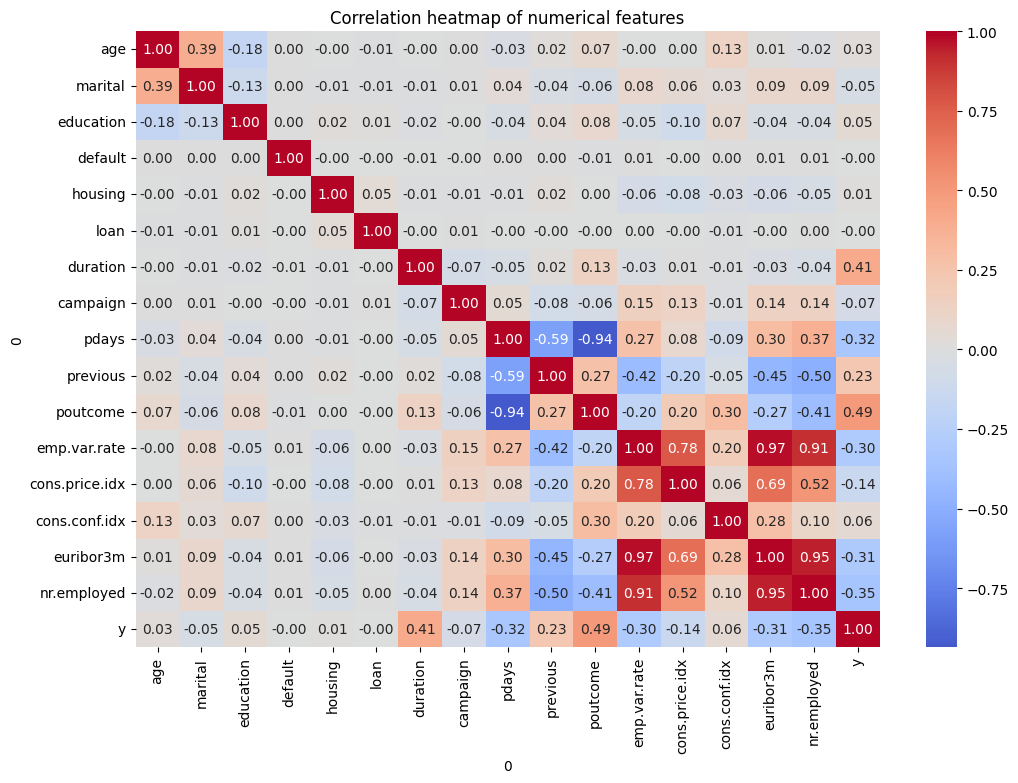

In [14]:

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation heatmap of numerical features")
plt.show()


## 2.2 Pearson p-value

In [16]:
import scipy.stats as stats
from scipy.stats import pearsonr

x = df['poutcome']
y = df['y']

mask = x.notna() & y.notna()
r, p = pearsonr(x[mask], y[mask])
print("Pearson r:", r, "p-value:", p)

Pearson r: 0.49378161426156686 p-value: 0.0


In [17]:

x = df['emp.var.rate']
y = df['y']

# 去除 NaN
mask = x.notna() & y.notna()
r, p = pearsonr(x[mask], y[mask])
print("Pearson r:", r, "p-value:", p)

Pearson r: -0.29829657786116165 p-value: 0.0


In [18]:
x = df['emp.var.rate']
y = df['euribor3m']

# 去除 NaN
mask = x.notna() & y.notna()
r, p = pearsonr(x[mask], y[mask])
print("Pearson r:", r, "p-value:", p)

Pearson r: 0.9722664943346755 p-value: 0.0


In [19]:
x = df['emp.var.rate']
y = df['nr.employed']

# 去除 NaN
mask = x.notna() & y.notna()
r, p = pearsonr(x[mask], y[mask])
print("Pearson r:", r, "p-value:", p)

Pearson r: 0.9071410811262322 p-value: 0.0


## 2.3 Reordered Correlation chart(with target featuure 'y')

Print the plot reordered by the correlation with the target feature('y').

/tmp/ipython-input-4293619136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_y.values, y=corr_with_y.index, palette="coolwarm")


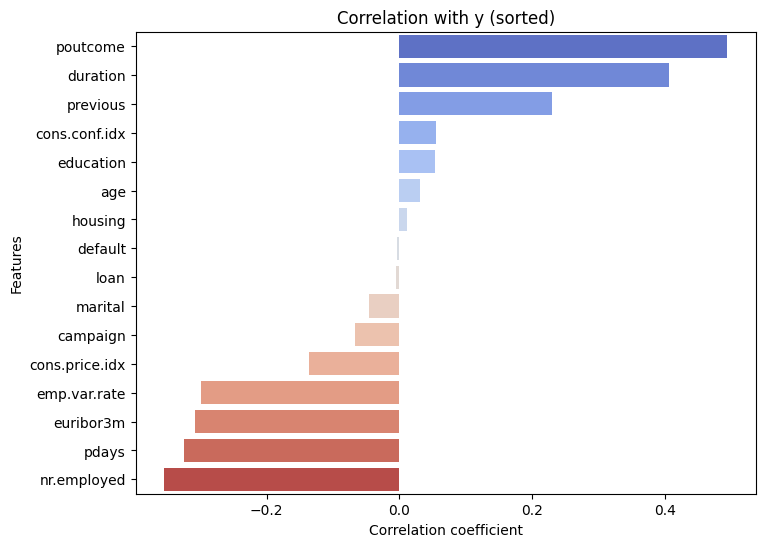

In [39]:
corr_with_y = df.corr(numeric_only=True)['y'].drop('y').sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_y.values, y=corr_with_y.index, palette="coolwarm")
plt.title("Correlation with y (sorted)")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

# 3 Numberical Feature

For numberical features, print boxplot.

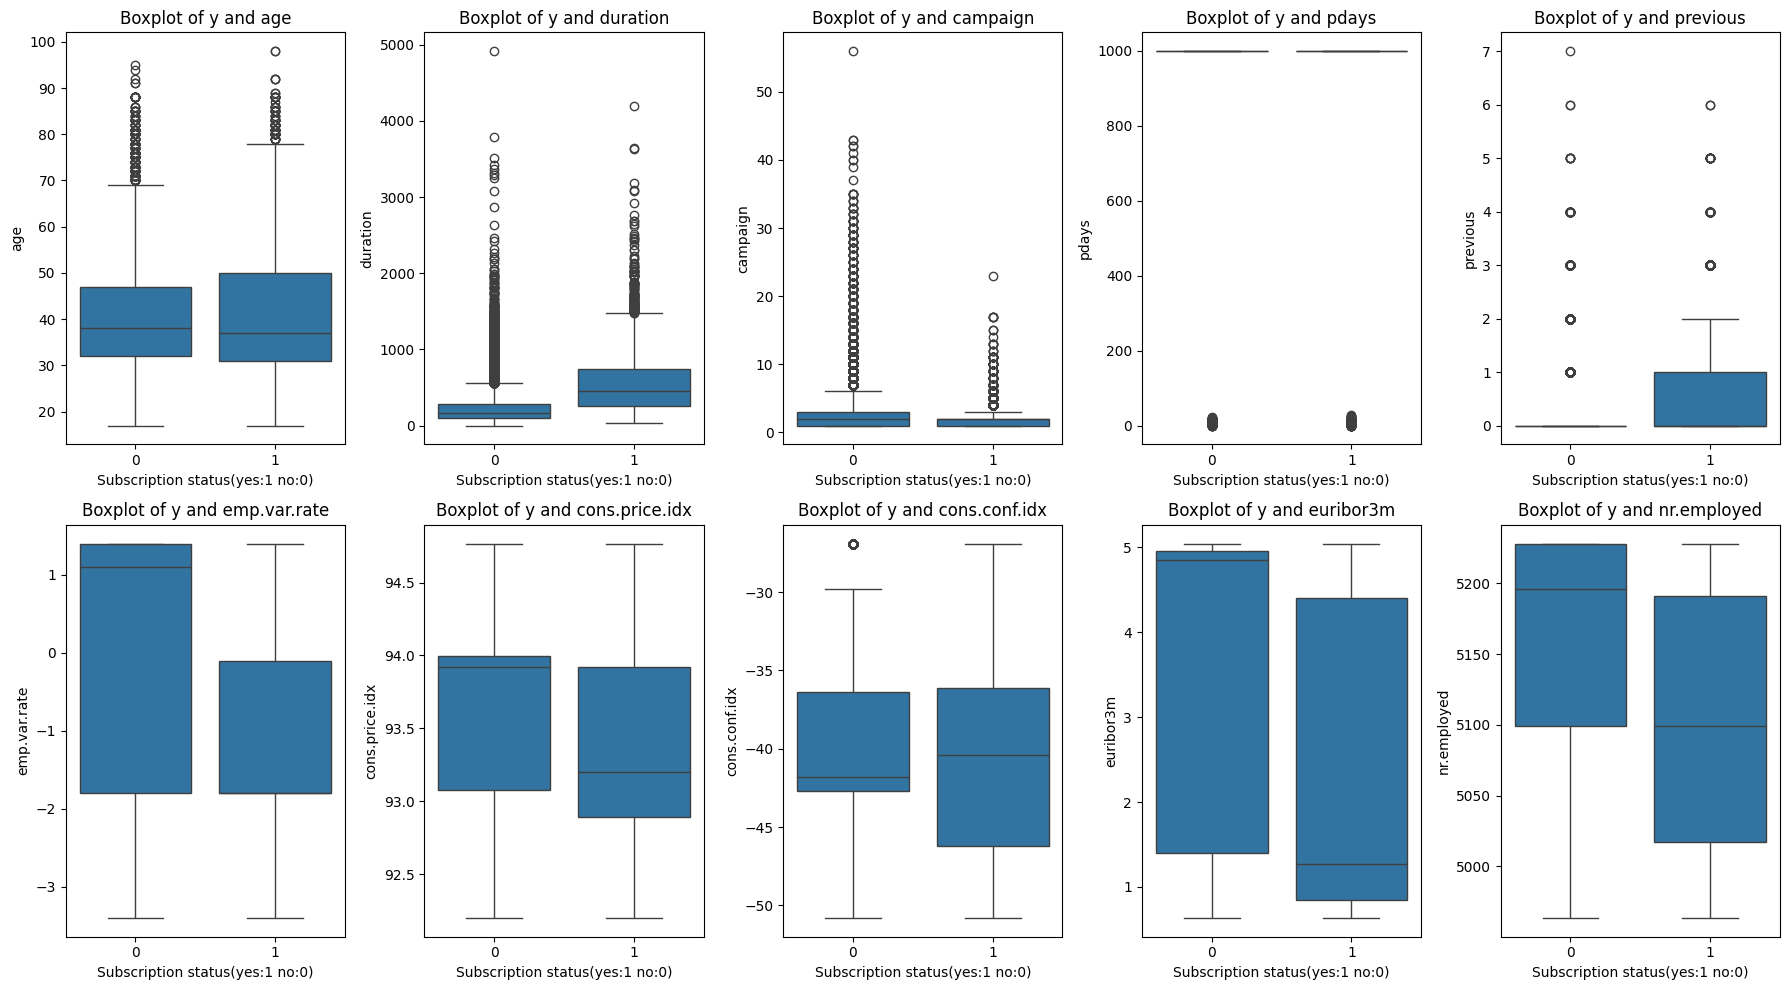

In [21]:

fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D
for i, col in enumerate(num_col): # enumerate() returns both the index and the value of the variable
    sns.boxplot(x='y', y=col, data=df, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
    #sns.histplot(df[var], kde=True, bins=30, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
    axes[i].set_title(f'Boxplot of y and {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Subscription status(yes:1 no:0)')
plt.tight_layout()
plt.show()

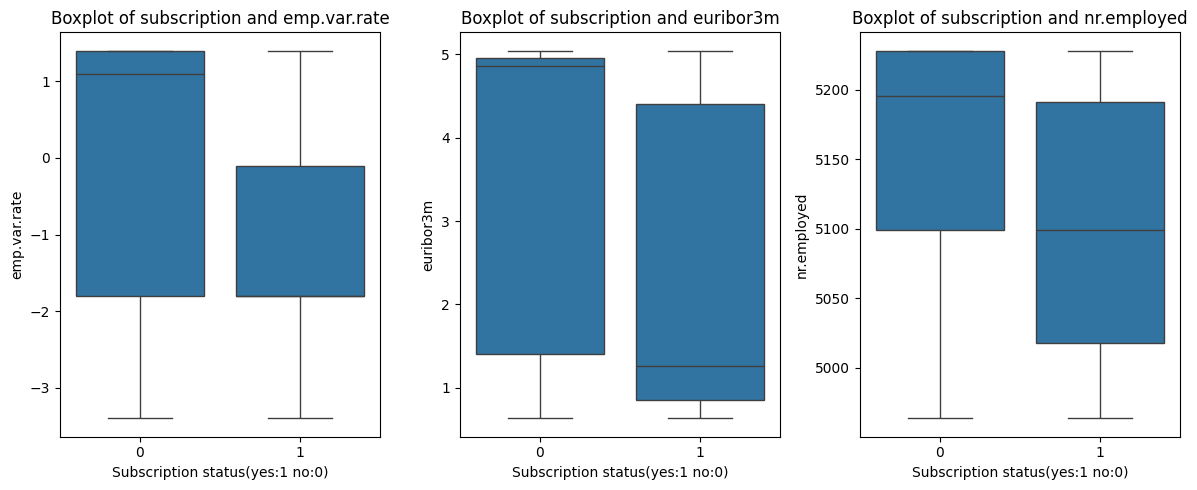

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
cnt = 0
axes = axes.flatten()  # Flatten the 2D array of axes to 1D
for i, col in enumerate(num_col): # enumerate() returns both the index and the value of the variable
  if col == 'emp.var.rate' or col == 'euribor3m' or col == 'nr.employed':
        sns.boxplot(x='y', y=col, data=df, ax=axes[cnt]) # ax=axes[i] specifies the subplot to plot on
        #sns.histplot(df[var], kde=True, bins=30, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
        axes[cnt].set_title(f'Boxplot of subscription and {col}')
        axes[cnt].set_ylabel(col)
        axes[cnt].set_xlabel('Subscription status(yes:1 no:0)')
        cnt += 1
plt.tight_layout()
plt.show()

For ordered(trans) feature, try boxplot.

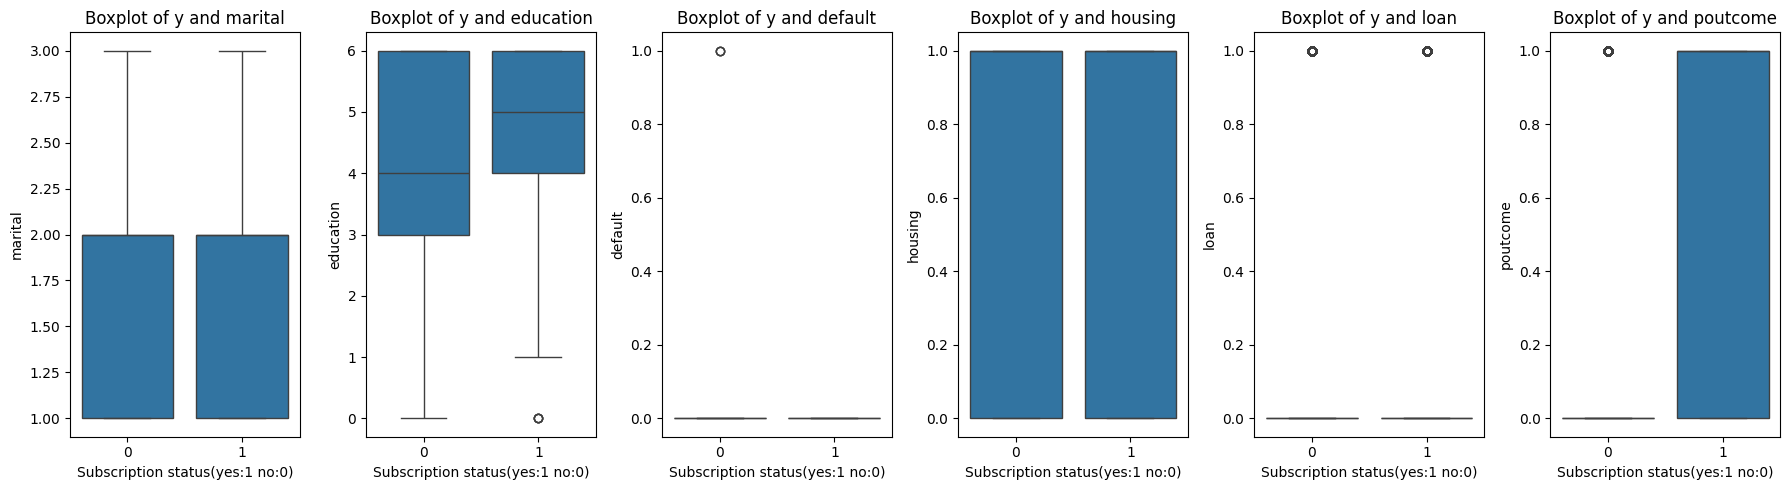

In [23]:
fig, axes = plt.subplots(1, 6, figsize=(18, 5))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D
for i, col in enumerate(level_col): # enumerate() returns both the index and the value of the variable
    sns.boxplot(x='y', y=col, data=df, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
    #sns.histplot(df[var], kde=True, bins=30, ax=axes[i]) # ax=axes[i] specifies the subplot to plot on
    axes[i].set_title(f'Boxplot of y and {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Subscription status(yes:1 no:0)')
plt.tight_layout()
plt.show()

# 4 Categorical Features

## 4.1 Chart of Grouped Analysis

For categorical features, print the subscription rate by category and observe the results.

In [24]:
df = df_copy.copy()

In [25]:
def plot_subscription_rate(df, cat_col="job", target_col="y"):
    y_num = df[target_col].map({'yes':1, 'no':0}) if df[target_col].dtype=='object' else df[target_col]
    stats = df.groupby(cat_col).apply(
        lambda g: pd.Series({
            "sub_rate": (y_num.loc[g.index]==1).mean(),
            "count": len(g)
        })
    ).sort_values("sub_rate", ascending=False)
    plt.figure(figsize=(10,6))
    bars = plt.barh(stats.index, stats["sub_rate"], color="skyblue")

    plt.xlabel("Subscription Rate (Proportion of target=1)")
    plt.ylabel(cat_col.capitalize())
    plt.title(f"Subscription Rate and Sample Size by {cat_col.capitalize()}")
    for i, (rate, cnt) in enumerate(zip(stats["sub_rate"], stats["count"])):
        plt.text(rate+0.01, i, f"n={cnt}", va="center")

    plt.gca().invert_yaxis()
    plt.xlim(0, 1.05)
    plt.show()

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


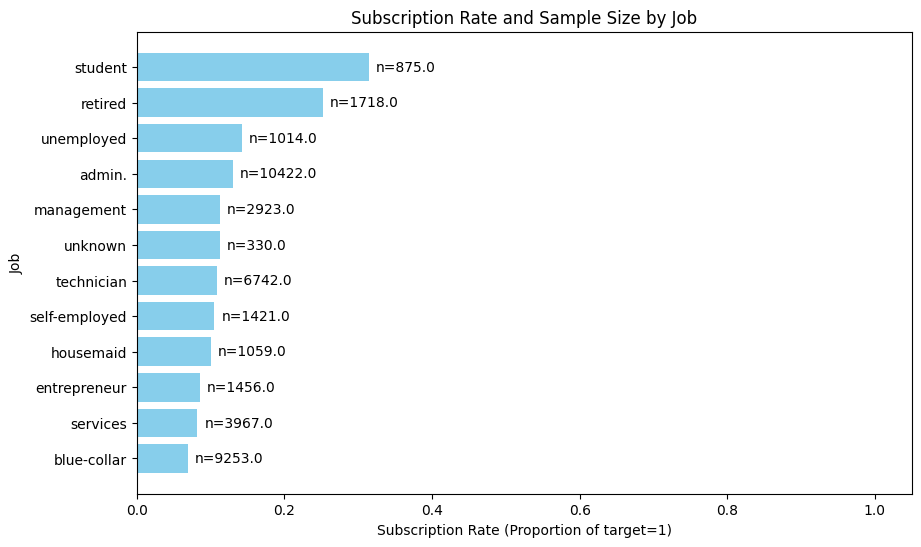

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


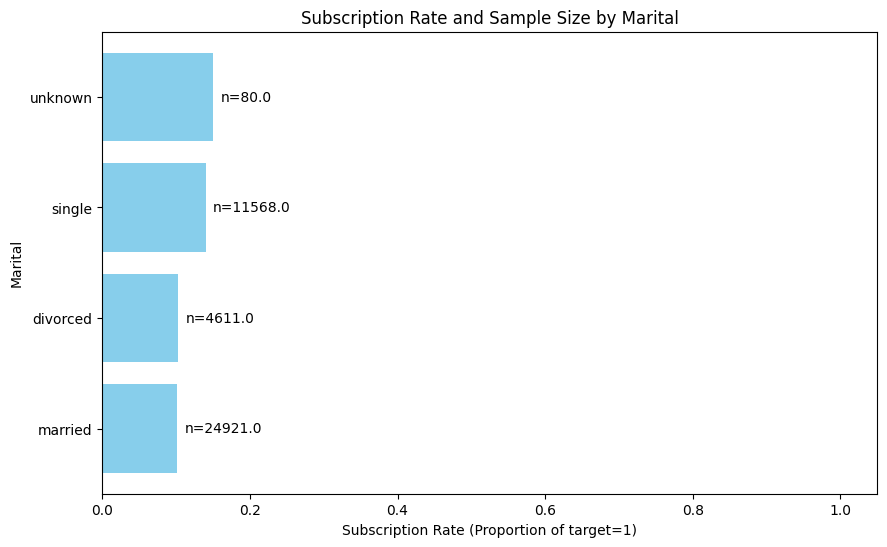

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


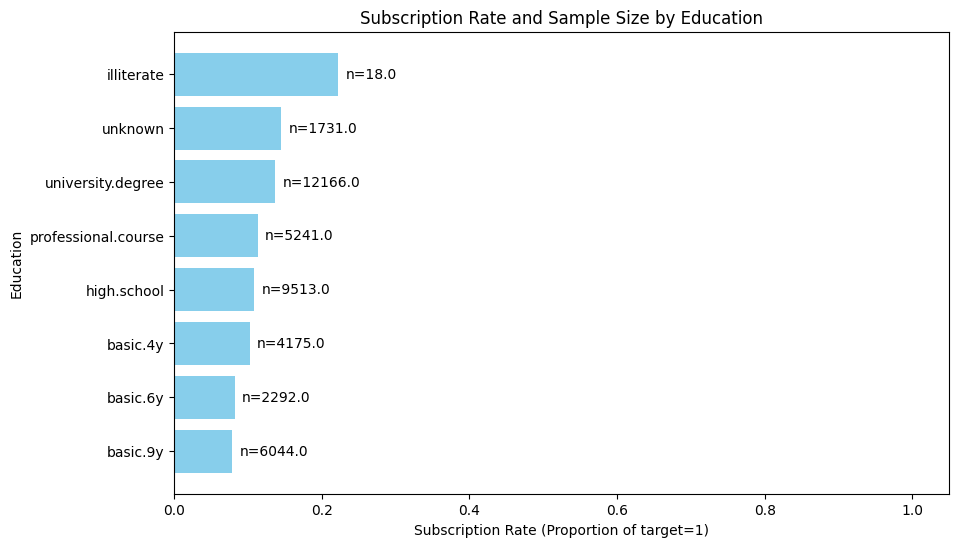

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


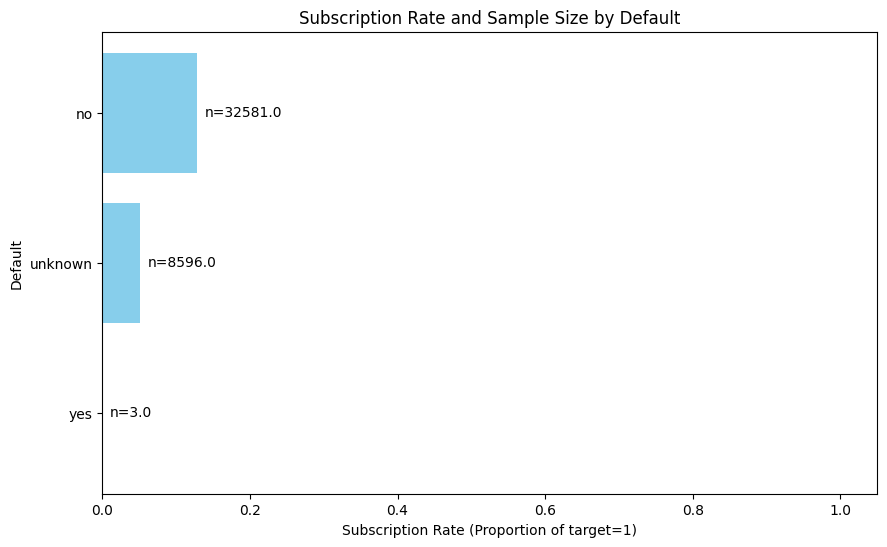

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


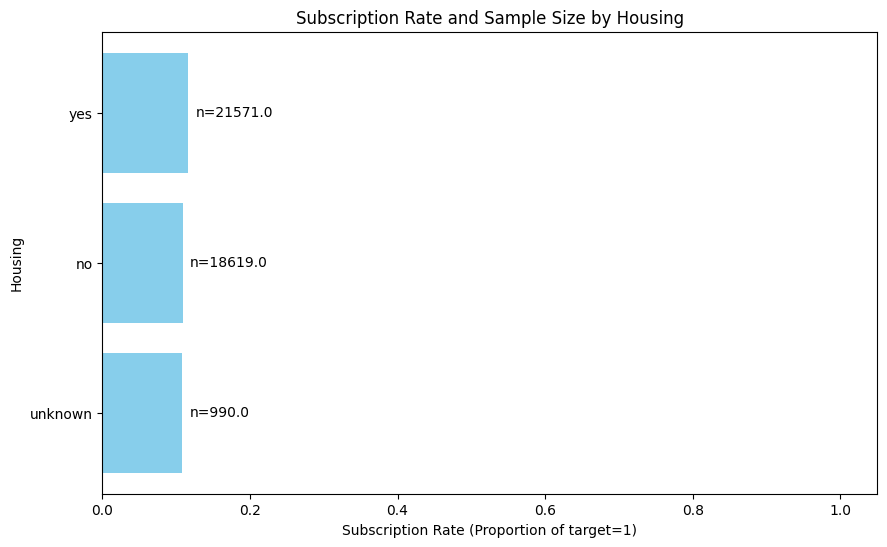

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


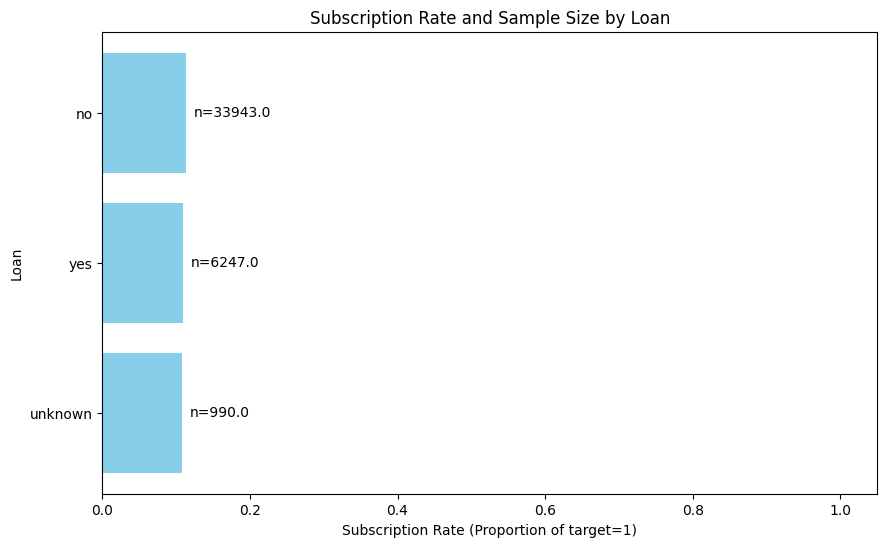

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


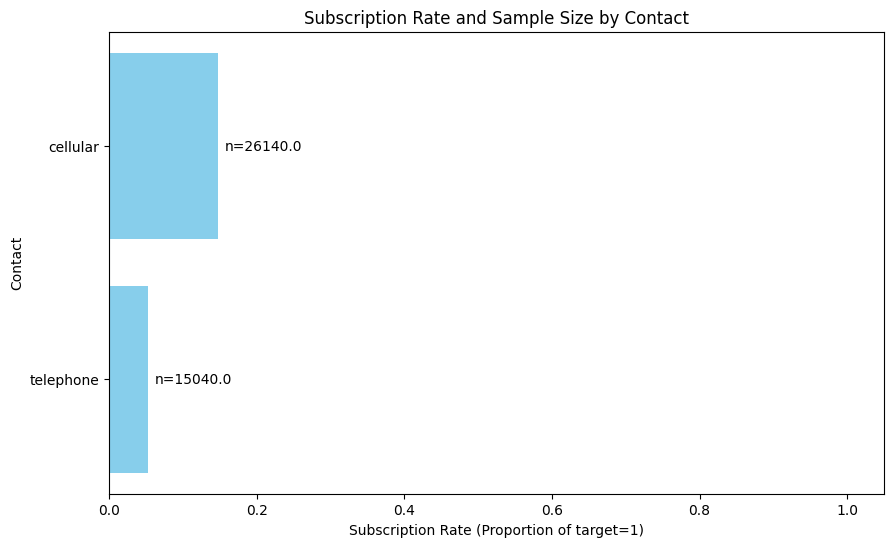

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


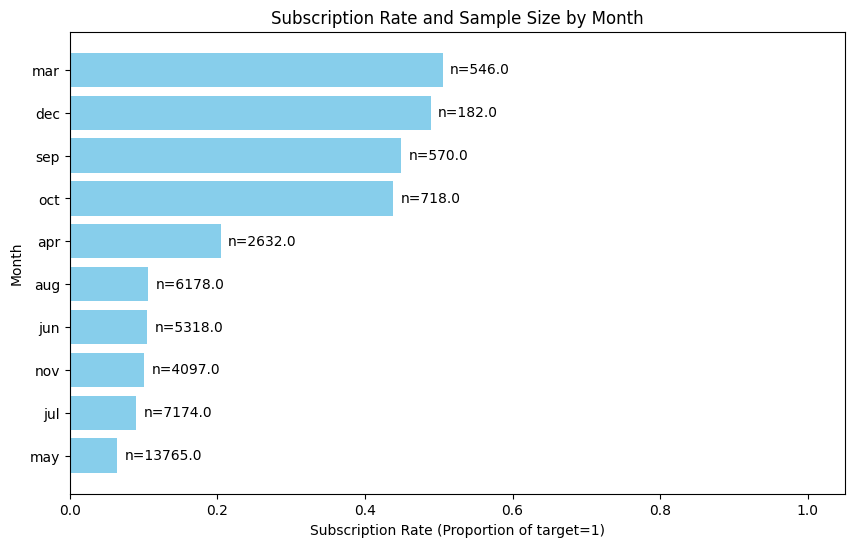

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


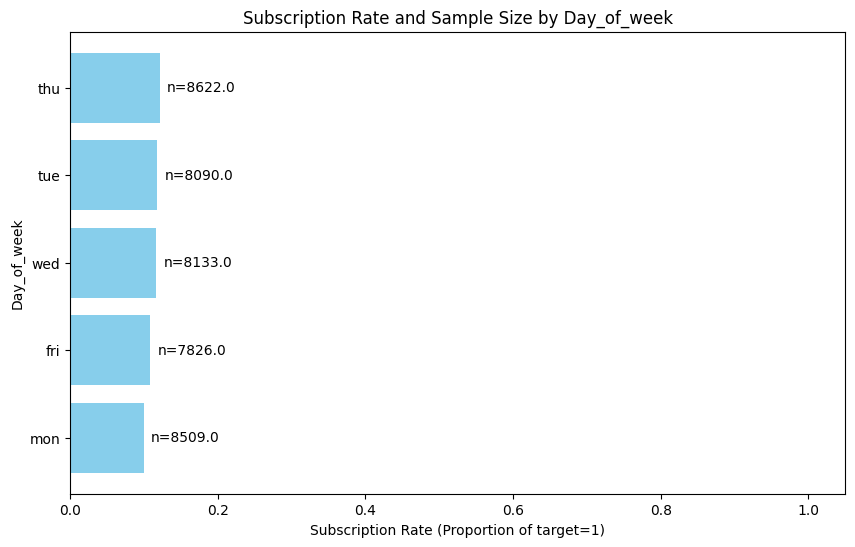

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


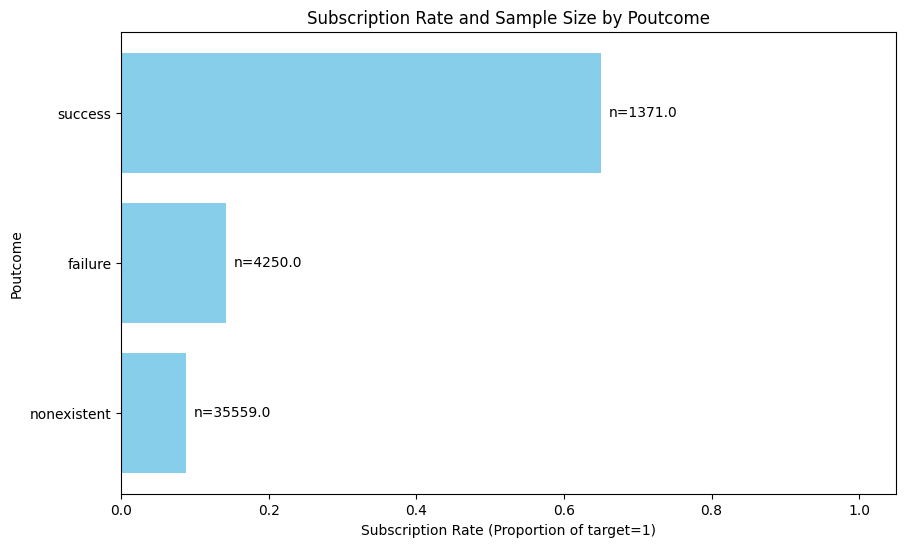

/tmp/ipython-input-2233077732.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df.groupby(cat_col).apply(


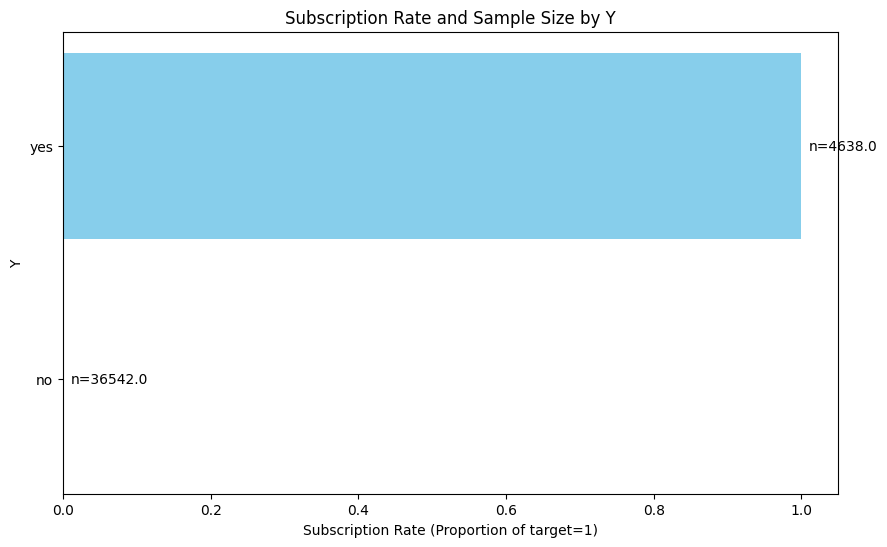

In [26]:

for i, var in enumerate(obj_col):
  plot_subscription_rate(df, cat_col=var, target_col='y')

## 4.2 Chi-square test p-value

Calculate the Chi-square test p-value for categorical variables.

In [27]:
from scipy.stats import chi2_contingency
import pandas as pd

for i, col in enumerate(obj_col):
  contingency = pd.crosstab(df[col], df['y'])
  chi2, p, dof, expected = chi2_contingency(contingency)
  print("Chi-square test p-value of ", col, " and y: ", p)

Chi-square test p-value of  job  and y:  9.842278329355203e-199
Chi-square test p-value of  marital  and y:  1.7975340906803586e-26
Chi-square test p-value of  education  and y:  4.1099278003902133e-38
Chi-square test p-value of  default  and y:  6.27078237084985e-89
Chi-square test p-value of  housing  and y:  0.05764351633684631
Chi-square test p-value of  loan  and y:  0.5859912582570149
Chi-square test p-value of  contact  and y:  2.8489675482266116e-189
Chi-square test p-value of  month  and y:  0.0
Chi-square test p-value of  day_of_week  and y:  2.988231734812865e-05
Chi-square test p-value of  poutcome  and y:  0.0
Chi-square test p-value of  y  and y:  0.0


## 4.3 Grouped Analysis

For each feature, print the telemarketing subscription outcome rate by category.

In [28]:
df['age_group'] = pd.cut(df['age'], bins=[17,30,40,50,60,100], labels=["18-30","31-40","41-50","51-60","60+"])
sub_rate_by_age = df.groupby("age_group")['y'].apply(lambda x: (x=="yes").mean())
print("\nsub rate by age：")
print(sub_rate_by_age)

for i, col in enumerate(obj_col):
  sub_rate = df.groupby(col)['y'].apply(lambda x: (x=="yes").mean()).sort_values(ascending=False)
  print("\nsub rate by ", col, " :")
  print(sub_rate)


sub rate by age：
age_group
18-30    0.152074
31-40    0.097479
41-50    0.081657
51-60    0.106573
60+      0.454846
Name: y, dtype: float64

sub rate by  job  :
job
student          0.314286
retired          0.252037
unemployed       0.142012
admin.           0.129726
management       0.112213
unknown          0.112121
technician       0.108128
self-employed    0.104856
housemaid        0.100094
entrepreneur     0.085165
services         0.081422
blue-collar      0.068951
Name: y, dtype: float64

sub rate by  marital  :
marital
unknown     0.150000
single      0.140041
divorced    0.103231
married     0.101521
Name: y, dtype: float64

sub rate by  education  :
education
illiterate             0.222222
unknown                0.145003
university.degree      0.137186
professional.course    0.113337
high.school            0.108378
basic.4y               0.102515
basic.6y               0.082024
basic.9y               0.078259
Name: y, dtype: float64

sub rate by  default  :
default
no    

/tmp/ipython-input-3700038740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_rate_by_age = df.groupby("age_group")['y'].apply(lambda x: (x=="yes").mean())
